In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [3]:
# Get a list of all files which are .csv files in ../DOTSSimulator/Assets/SimulationResults
import os
files = [f for f in os.listdir('.') if f.endswith('.csv')]
# Sort the files descending
files.sort()

print(f'Found {len(files)} files')
print(f'Newest file: {files[0]}')
print(files)


Found 3 files
Newest file: 3-1-feeding-range-1.csv
['3-1-feeding-range-1.csv', '3-2-feeding-range-10.csv', '3-3-up-feeding-rate.csv']


In [20]:
results_df: pd.DataFrame = pd.read_csv(files[0])
# Print basic information about the dataframe
print(results_df.info())

results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                1279 non-null   int64  
 1   TimeStamp           1279 non-null   float64
 2   AvgEnergy           1279 non-null   float64
 3   NoBoids             1279 non-null   int64  
 4   NoFoodSources       1279 non-null   int64  
 5   TotalFoodAvailable  1279 non-null   float64
 6   Polarization        1279 non-null   float64
 7   Expanse             1279 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 80.1 KB
None


,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.000999,384.0014,25,1,450.0359,0.458060,0.742884
1,1,29.999510,384.0545,25,1,450.8535,0.474646,0.629613
2,2,59.999530,384.1080,25,1,451.6587,0.484118,0.715302
3,3,89.999530,384.1613,25,1,452.4706,0.466635,0.903536
4,4,119.999500,384.2142,25,1,453.2919,0.426313,0.449123


In [21]:
# Configuration:

truncated_df_1 = results_df.iloc[1:361]

print(truncated_df_1.describe())
truncated_df_1.info()
truncated_df_1.head()

             Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  360.000000    360.000000  360.000000    360.0          360.0   
mean   180.500000   5415.039694  393.602953     25.0            1.0   
std    104.067286   3122.068140    5.505071      0.0            0.0   
min      1.000000     29.999510  384.054500     25.0            1.0   
25%     90.750000   2722.497000  388.847425     25.0            1.0   
50%    180.500000   5414.997000  393.641100     25.0            1.0   
75%    270.250000   8107.627000  398.382375     25.0            1.0   
max    360.000000  10800.130000  402.982600     25.0            1.0   

       TotalFoodAvailable  Polarization     Expanse  
count          360.000000    360.000000  360.000000  
mean           597.006250      0.476262    0.883550  
std             85.515891      0.018102    0.191323  
min            450.853500      0.398614    0.325605  
25%            523.462375      0.467237    0.762494  
50%            596.052550      0.479

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
1,1,29.99951,384.0545,25,1,450.8535,0.474646,0.629613
2,2,59.99953,384.1080,25,1,451.6587,0.484118,0.715302
3,3,89.99953,384.1613,25,1,452.4706,0.466635,0.903536
4,4,119.99950,384.2142,25,1,453.2919,0.426313,0.449123
5,5,149.99950,384.2678,25,1,454.0966,0.490276,1.245167


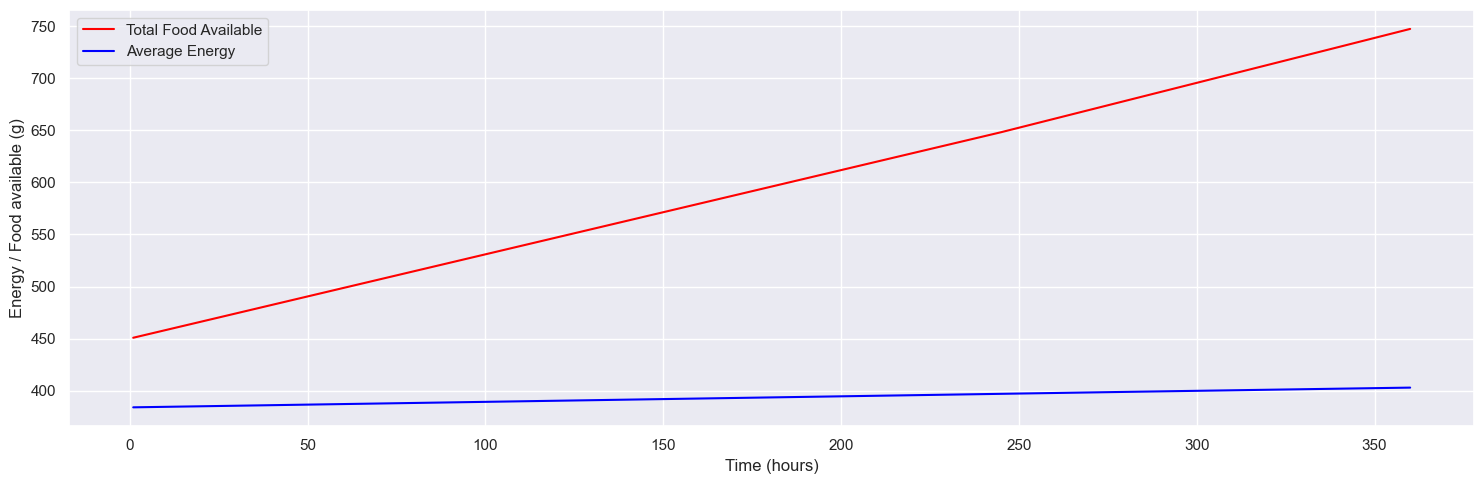

In [22]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df_1, x='Step', y='TotalFoodAvailable', color='red', ax=ax, label='Total Food Available')
sns.lineplot(data=truncated_df_1, x='Step', y='AvgEnergy', color='blue', ax=ax, label='Average Energy')
plt.xlabel('Time (hours)')
plt.ylabel('Energy / Food available (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp3-Environment-1.pdf')

In [23]:
# Compute coefficient in avg energy
min_food = truncated_df_1['TotalFoodAvailable'].min()
max_food = truncated_df_1['TotalFoodAvailable'].max()
print(f'Min food available: {min_food}')
print(f'Max food available: {max_food}')
print(f'Coefficient: {(max_food - min_food) / 30}')

# Compute coefficient in avg energy
min_energy = truncated_df_1['AvgEnergy'].min()
max_energy = truncated_df_1['AvgEnergy'].max()
print(f'Min energy: {min_energy}')
print(f'Max energy: {max_energy}')
coeff = (max_energy - min_energy) / 30
print(f'Coefficient: {(max_energy - min_energy) / 30}')

Min food available: 450.8535
Max food available: 747.3796
Coefficient: 19.768406666666667
Min energy: 384.0545
Max energy: 402.9826
Coefficient: 1.2618733333333314


In [24]:
results_df: pd.DataFrame = pd.read_csv(files[1])
truncated_df_2 = results_df.iloc[1:361]

print(truncated_df_2.describe())
truncated_df_2.info()
truncated_df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                1409 non-null   int64  
 1   TimeStamp           1409 non-null   float64
 2   AvgEnergy           1409 non-null   float64
 3   NoBoids             1409 non-null   int64  
 4   NoFoodSources       1409 non-null   int64  
 5   TotalFoodAvailable  1409 non-null   float64
 6   Polarization        1409 non-null   float64
 7   Expanse             1409 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 88.2 KB
None
             Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  360.000000    360.000000  360.000000    360.0          360.0   
mean   180.500000   5415.058156  399.482706     25.0            1.0   
std    104.067286   3122.090370    8.925208      0.0            0.0   
min      1.000000     29.999910  384.088100     25.0            

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
1,1,29.99991,384.0881,25,1,450.0123,0.428068,0.892284
2,2,59.99958,384.1739,25,1,450.0123,0.480206,0.657108
3,3,89.99911,384.2597,25,1,450.0123,0.496985,0.833599
4,4,119.99710,384.3454,25,1,450.0123,0.482458,0.848897
5,5,149.99910,384.4312,25,1,450.0123,0.474187,1.068337


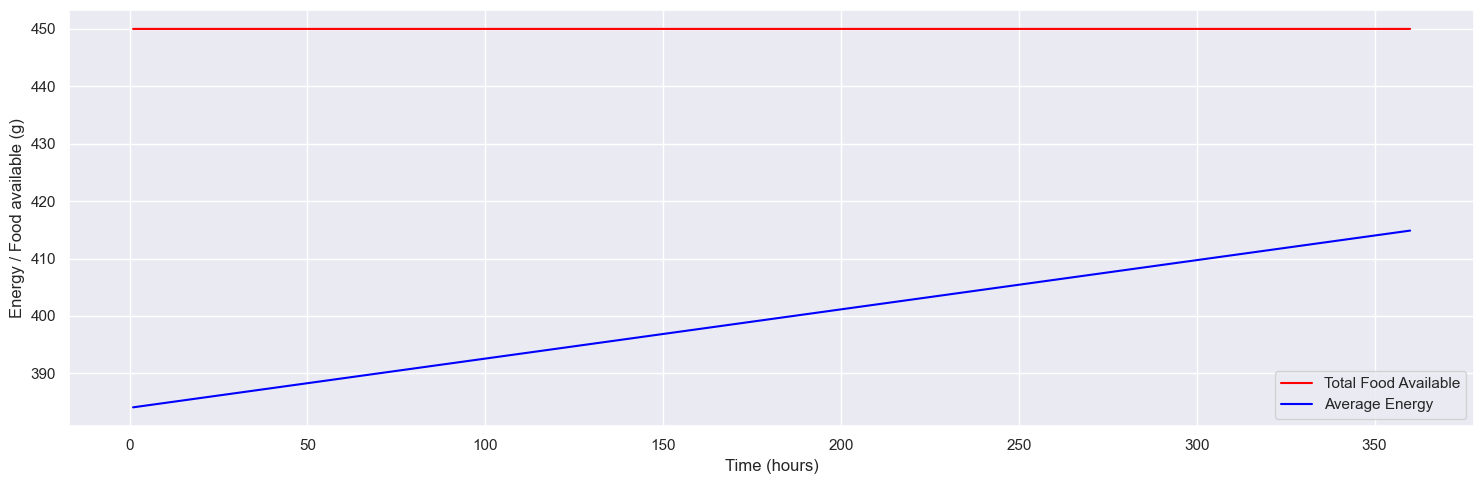

In [25]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df_2, x='Step', y='TotalFoodAvailable', color='red', ax=ax, label='Total Food Available')
sns.lineplot(data=truncated_df_2, x='Step', y='AvgEnergy', color='blue', ax=ax, label='Average Energy')
plt.xlabel('Time (hours)')
plt.ylabel('Energy / Food available (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp3-Environment-2.pdf')

In [26]:
# Compute coefficient in avg energy
min_food_2 = truncated_df_2['TotalFoodAvailable'].min()
max_food_2 = truncated_df_2['TotalFoodAvailable'].max()
print(f'Min food available: {min_food_2}')
print(f'Max food available: {max_food_2}')
print(f'Coefficient: {(max_food_2 - min_food_2) / 15}')

# Compute coefficient in avg energy
min_energy_2 = truncated_df_2['AvgEnergy'].min()
max_energy_2 = truncated_df_2['AvgEnergy'].max()
print(f'Min energy: {min_energy_2}')
print(f'Max energy: {max_energy_2}')
coeff_2 = (max_energy_2 - min_energy_2) / 15
print(f'Coefficient: {coeff_2}')

Min food available: 450.0123
Max food available: 450.0125
Coefficient: 1.3333333333775954e-05
Min energy: 384.0881
Max energy: 414.8773
Coefficient: 2.052613333333333


In [27]:
print(f'Coefficient difference: {coeff_2 - coeff}')
scale = coeff_2 / coeff
print(f'Coefficient scale: {scale}')


feedingrate = 0.000030285493827160491
new_feedingrate = feedingrate * scale
print(f'New feeding rate: {feedingrate * scale}')

Coefficient difference: 0.7907400000000016
Coefficient scale: 1.6266397578203857
New feeding rate: 4.926358834448313e-05


Experiment 3.3 (Adjusted the feeding rate with a scalar previously computed)

In [28]:
results_df: pd.DataFrame = pd.read_csv(files[2])
# Print basic information about the dataframe
print(results_df.info())

# Configuration:

truncated_df_3 = results_df.iloc[:721]

print(truncated_df_3.describe())
truncated_df_3.info()
truncated_df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                1336 non-null   int64  
 1   TimeStamp           1336 non-null   float64
 2   AvgEnergy           1336 non-null   float64
 3   NoBoids             1336 non-null   int64  
 4   NoFoodSources       1336 non-null   int64  
 5   TotalFoodAvailable  1336 non-null   float64
 6   Polarization        1336 non-null   float64
 7   Expanse             1336 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 83.6 KB
None
            Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  721.00000    721.000000  721.000000    721.0          721.0   
mean   360.00000  10800.243744  419.373597     25.0            1.0   
std    208.27906   6248.610881   20.013890      0.0            0.0   
min      0.00000      0.001998  384.002800     25.0            1.0  

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.001998,384.0028,25,1,450.0013,0.458060,0.742884
1,1,29.999180,384.1037,25,1,449.6233,0.474646,0.629613
2,2,59.999820,384.2047,25,1,449.2429,0.487753,0.919586
3,3,89.998830,384.3051,25,1,448.8765,0.480646,1.115695
4,4,119.999800,384.4066,25,1,448.4834,0.482156,0.739452


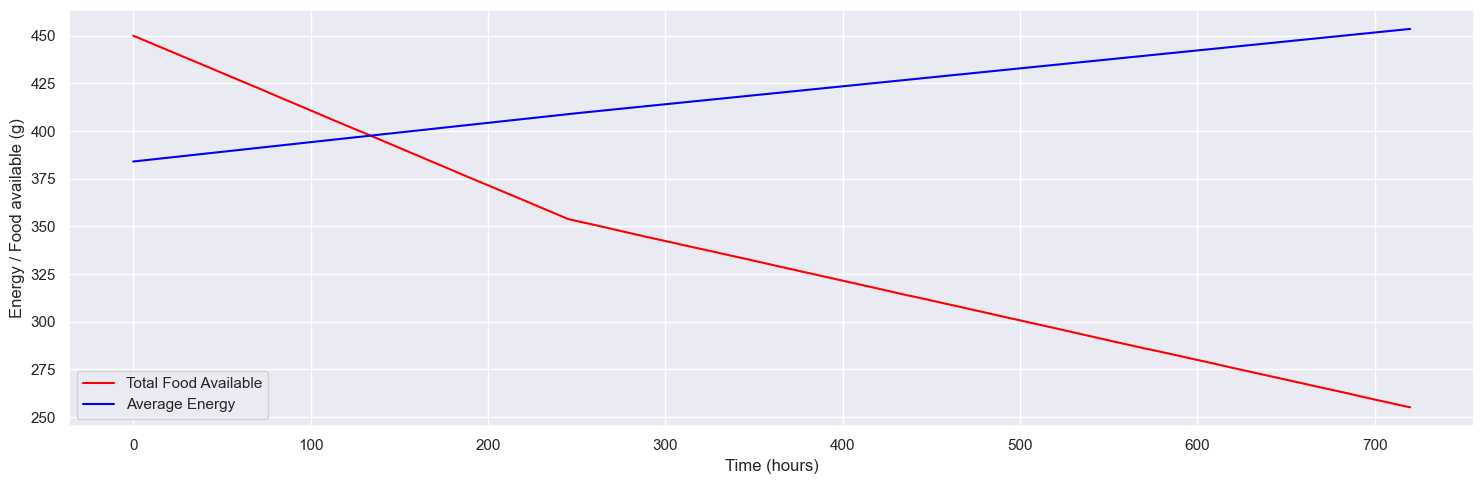

In [29]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df_3, x='Step', y='TotalFoodAvailable', color='red', ax=ax, label='Total Food Available')
sns.lineplot(data=truncated_df_3, x='Step', y='AvgEnergy', color='blue', ax=ax, label='Average Energy')
plt.xlabel('Time (hours)')
plt.ylabel('Energy / Food available (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp3-Environment-3.pdf')

In [30]:
min_energy_3 = truncated_df_3['AvgEnergy'].min()
max_energy_3 = truncated_df_3['AvgEnergy'].max()
print(f'Min energy: {min_energy_3}')
print(f'Max energy: {max_energy_3}')
coeff_3 = (max_energy_3 - min_energy_3) / 30
print(f'Coefficient: {coeff_3}')

Min energy: 384.0028
Max energy: 453.5499
Coefficient: 2.3182366666666665


In [31]:
expected_coeff = 2.058329999999999
print(f'Expected coefficient: {expected_coeff}')
print(f'Coefficient difference: {new_feedingrate - (coeff_3 - expected_coeff) * new_feedingrate}')

Expected coefficient: 2.058329999999999
Coefficient difference: 3.645965330982962e-05
